In [14]:
import pandas as pd

# Load the Excel file
file_path = 'GeneralAviationDashboard_Data_20221208_Public.xlsx'
sheet_name = 'Accidents'

# Read the data from the "Accidents" sheet
try:
    accidents_df = pd.read_excel(file_path, sheet_name=sheet_name)
    read_success = True
except Exception as e:
    read_success = False
    error_message = str(e)

read_success, accidents_df.head() if read_success else print(error_message)

# Filter the dataset for accidents in Texas with a fatal injury level
filtered_df = accidents_df[(accidents_df['StateOrRegion'] == 'Texas') & (accidents_df['InjuryLevel'] == 'Fatal')]

# print(filtered_df.head())  # Displaying the first few rows of the filtered data

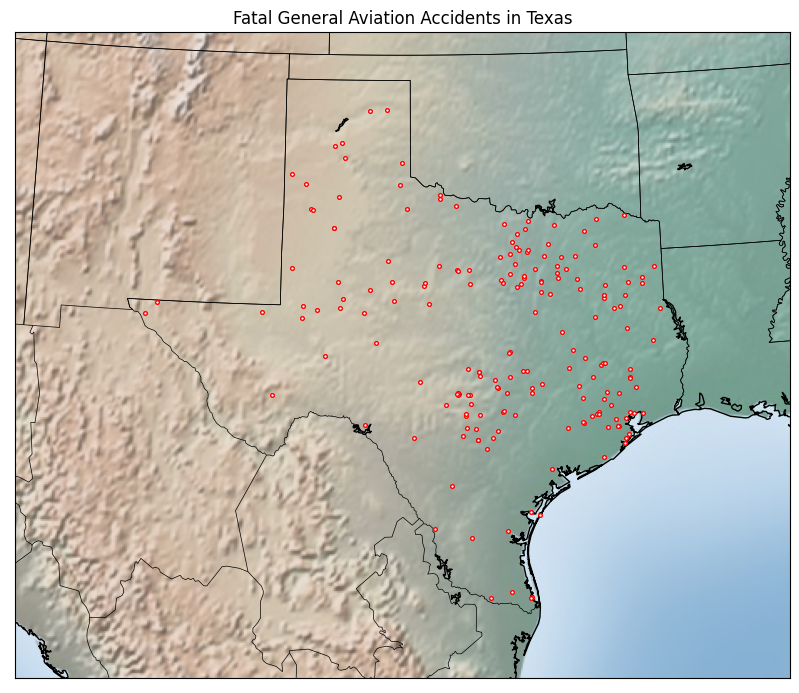

In [15]:

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Define the boundaries for the map of Alaska
lat_min, lat_max = filtered_df.Latitude.min() - 1, filtered_df.Latitude.max() + 1
lon_min, lon_max = filtered_df.Longitude.min() - 1, filtered_df.Longitude.max() + 1

# Create a Basemap instance for Texas
plt.figure(figsize=(10, 10))
map = Basemap(projection='lcc', resolution='i',
              lat_0=(lat_max + lat_min) / 2, lon_0=(lon_max + lon_min) / 2,
              width=1.1*(lon_max - lon_min)*111e3, height=1.1*(lat_max - lat_min)*111e3)

# Draw coastlines, countries, and states
map.drawcoastlines()
map.drawcountries()
map.drawstates()

# Draw topographic image
# map.etopo()
map.shadedrelief()

# Plot the accident locations
x, y = map(filtered_df.Longitude.values, filtered_df.Latitude.values)
map.scatter(x, y, marker='o', color='w', zorder=5, edgecolor='r', s=7)

plt.title('Fatal General Aviation Accidents in Texas')
plt.show()

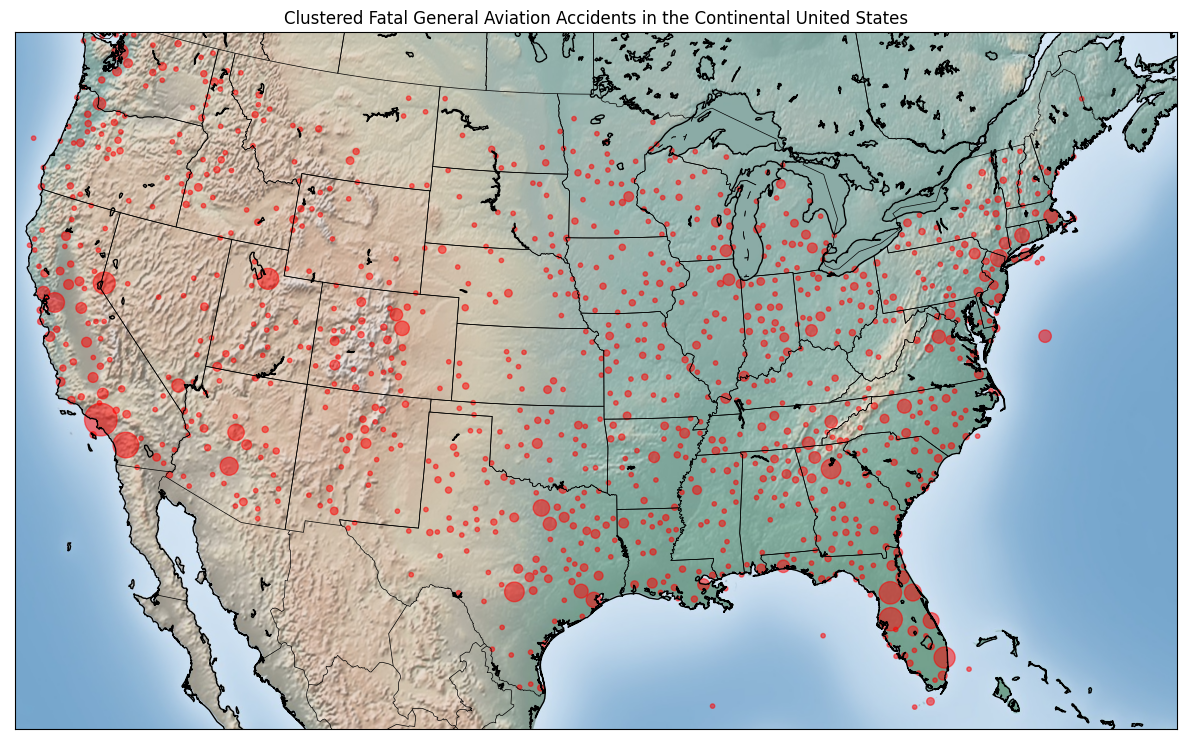

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import DBSCAN

# Reload the file and dataset due to the reset of the code execution state
file_path = 'GeneralAviationDashboard_Data_20221208_Public.xlsx'
accidents_df = pd.read_excel(file_path, sheet_name='Accidents')

# Filter the original dataset for accidents in the continental United States (excluding Alaska and Hawaii)
continental_us_accidents = accidents_df[
    (accidents_df['Country'] == 'United States') & 
    (accidents_df['StateOrRegion'] != 'Alaska') & 
    (accidents_df['StateOrRegion'] != 'Hawaii') & 
    (accidents_df['InjuryLevel'] == 'Fatal')
]

# Apply DBSCAN clustering to these accidents
coords_cont_us = continental_us_accidents[['Latitude', 'Longitude']].values
db_cont_us = DBSCAN(eps=0.3, min_samples=1).fit(coords_cont_us)
labels_cont_us = db_cont_us.labels_
n_clusters_cont_us = len(set(labels_cont_us)) - (1 if -1 in labels_cont_us else 0)

# Create cluster data for continental US
cluster_data_cont_us = []
for i in range(n_clusters_cont_us):
    mask = (labels_cont_us == i)
    cluster_center = [coords_cont_us[mask][:, 0].mean(), coords_cont_us[mask][:, 1].mean()]
    cluster_count = mask.sum()
    cluster_data_cont_us.append({'Latitude': cluster_center[0], 'Longitude': cluster_center[1], 'Count': cluster_count})

# Convert the list of dictionaries to a DataFrame
clusters_cont_us = pd.DataFrame(cluster_data_cont_us)

# Re-plotting the map for the continental United States
plt.figure(figsize=(15, 10))
map_cont_us = Basemap(projection='lcc', resolution='i',
                      lat_0=38, lon_0=-95,
                      width=5000e3, height=3000e3)

map_cont_us.drawcoastlines()
map_cont_us.drawcountries()
map_cont_us.drawstates()
map_cont_us.shadedrelief()

# Plot the clusters as bubbles for the continental US
x, y = map_cont_us(clusters_cont_us.Longitude.values, clusters_cont_us.Latitude.values)
bubble_sizes = 10 * clusters_cont_us.Count  # Adjust bubble size multiplier as needed
map_cont_us.scatter(x, y, marker='o', color='r', s=bubble_sizes, alpha=0.5)

plt.title('Clustered Fatal General Aviation Accidents in the Continental United States')
plt.show()


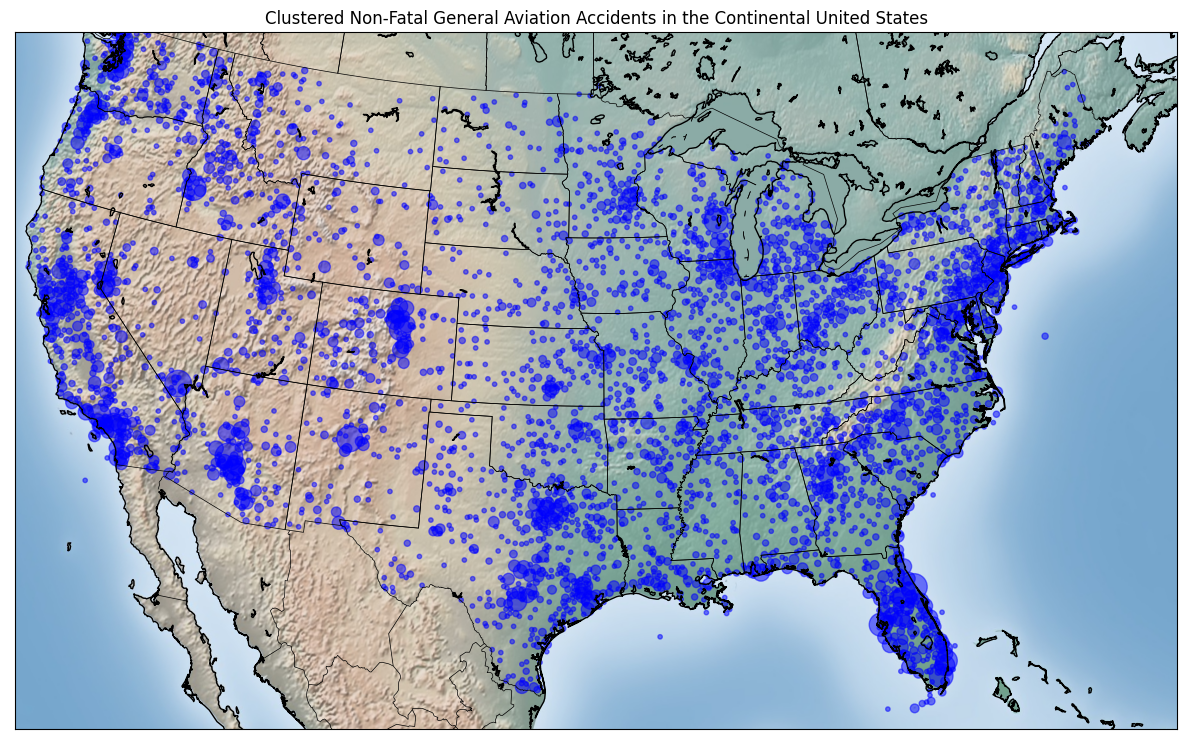

In [17]:
# Filter the original dataset for non-fatal accidents in the continental United States (excluding Alaska and Hawaii)
continental_us_non_fatal_accidents = accidents_df[
    (accidents_df['Country'] == 'United States') & 
    (accidents_df['StateOrRegion'] != 'Alaska') & 
    (accidents_df['StateOrRegion'] != 'Hawaii') & 
    (accidents_df['InjuryLevel'] == 'Non-Fatal')
]
# Remove rows with missing values in Latitude or Longitude for non-fatal accidents
continental_us_non_fatal_accidents_cleaned = continental_us_non_fatal_accidents.dropna(subset=['Latitude', 'Longitude'])

# Apply DBSCAN clustering to the cleaned non-fatal accidents data
coords_cont_us_non_fatal_cleaned = continental_us_non_fatal_accidents_cleaned[['Latitude', 'Longitude']].values
db_cont_us_non_fatal_cleaned = DBSCAN(eps=0.1, min_samples=1).fit(coords_cont_us_non_fatal_cleaned)
labels_cont_us_non_fatal_cleaned = db_cont_us_non_fatal_cleaned.labels_
n_clusters_cont_us_non_fatal_cleaned = len(set(labels_cont_us_non_fatal_cleaned)) - (1 if -1 in labels_cont_us_non_fatal_cleaned else 0)

# Create cluster data for continental US non-fatal accidents
cluster_data_cont_us_non_fatal_cleaned = []
for i in range(n_clusters_cont_us_non_fatal_cleaned):
    mask = (labels_cont_us_non_fatal_cleaned == i)
    cluster_center = [coords_cont_us_non_fatal_cleaned[mask][:, 0].mean(), coords_cont_us_non_fatal_cleaned[mask][:, 1].mean()]
    cluster_count = mask.sum()
    cluster_data_cont_us_non_fatal_cleaned.append({'Latitude': cluster_center[0], 'Longitude': cluster_center[1], 'Count': cluster_count})

# Convert the list of dictionaries to a DataFrame
clusters_cont_us_non_fatal_cleaned = pd.DataFrame(cluster_data_cont_us_non_fatal_cleaned)

# Re-plotting the map for the continental United States with non-fatal accidents
plt.figure(figsize=(15, 10))
map_cont_us_non_fatal = Basemap(projection='lcc', resolution='i',
                                lat_0=38, lon_0=-95,
                                width=5000e3, height=3000e3)

map_cont_us_non_fatal.drawcoastlines()
map_cont_us_non_fatal.drawcountries()
map_cont_us_non_fatal.drawstates()
map_cont_us_non_fatal.shadedrelief()

# Plot the clusters as bubbles for the continental US non-fatal accidents
x, y = map_cont_us_non_fatal(clusters_cont_us_non_fatal_cleaned.Longitude.values, clusters_cont_us_non_fatal_cleaned.Latitude.values)
bubble_sizes_non_fatal = 10 * clusters_cont_us_non_fatal_cleaned.Count  # Adjust bubble size multiplier as needed
map_cont_us_non_fatal.scatter(x, y, marker='o', color='b', s=bubble_sizes_non_fatal, alpha=0.5)

plt.title('Clustered Non-Fatal General Aviation Accidents in the Continental United States')
plt.show()
